In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio

Matplotlib is building the font cache; this may take a moment.


In [2]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
world = gpd.read_file('data/world.gpkg')
src_elev = rasterio.open('output/elev.tif')
src_grain = rasterio.open('output/grain.tif')
src_multi_rast = rasterio.open('data/landsat.tif')

In [4]:
world

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [5]:
world.iloc[0:3,:]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."


In [6]:
world[['name_long', 'geometry']]

,name_long,geometry
0,Fiji,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,Tanzania,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,South Sudan,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [7]:
world.loc[:, 'name_long':'pop']

,name_long,continent,region_un,subregion,type,area_km2,pop
0,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000
1,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000
2,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN
...,...,...,...,...,...,...,...
174,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000
175,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000
176,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000


In [8]:
world[['name_long', 'pop']].rename(columns={'pop': 'population'})

,name_long,population
0,Fiji,885806.000
1,Tanzania,52234869.000
2,Western Sahara,NaN
...,...,...
174,Kosovo,1821800.000
175,Trinidad and Tobago,1354493.000
176,South Sudan,11530971.000


In [9]:
idx_small = world['area_km2'] < 10000
idx_small

0      False
1      False
2      False
       ...  
174    False
175     True
176    False
Name: area_km2, Length: 177, dtype: bool

In [10]:
small_countries = world[idx_small]
small_countries

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
45,PR,Puerto Rico,North America,Americas,Caribbean,Dependency,9224.663,3534874.000,79.390,35066.046,"MULTIPOLYGON (((-66.28243 18.51476, -67.10068 ..."
79,PS,Palestine,Asia,Asia,Western Asia,Disputed,5037.104,4294682.000,73.126,4319.528,"MULTIPOLYGON (((35.39756 31.48909, 35.54525 31..."
89,VU,Vanuatu,Oceania,Oceania,Melanesia,Sovereign country,7490.040,258850.000,71.709,2892.342,"MULTIPOLYGON (((166.79316 -15.66881, 167.00121..."
...,...,...,...,...,...,...,...,...,...,...,...
160,None,Northern Cyprus,Asia,Asia,Western Asia,Sovereign country,3786.365,NaN,NaN,NaN,"MULTIPOLYGON (((32.73178 35.14003, 32.91957 35..."
161,CY,Cyprus,Asia,Asia,Western Asia,Sovereign country,6207.006,1152309.000,80.173,29786.366,"MULTIPOLYGON (((32.73178 35.14003, 32.25667 35..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."


In [11]:
world.loc[(world['area_km2']<10000)&(world['continent']=='Asia')]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
79,PS,Palestine,Asia,Asia,Western Asia,Disputed,5037.104,4294682.000,73.126,4319.528,"MULTIPOLYGON (((35.39756 31.48909, 35.54525 31..."
160,None,Northern Cyprus,Asia,Asia,Western Asia,Sovereign country,3786.365,NaN,NaN,NaN,"MULTIPOLYGON (((32.73178 35.14003, 32.91957 35..."
161,CY,Cyprus,Asia,Asia,Western Asia,Sovereign country,6207.006,1152309.000,80.173,29786.366,"MULTIPOLYGON (((32.73178 35.14003, 32.25667 35..."


In [12]:
world[world['continent'] == 'Asia'] \
    .loc[:, ['name_long', 'continent']] \
    .iloc[0:5, :]

,name_long,continent
5,Kazakhstan,Asia
6,Uzbekistan,Asia
8,Indonesia,Asia
24,Timor-Leste,Asia
76,Israel,Asia


In [13]:
world[
    (world['continent'] == "North America") |
    (world['continent'] == 'South America')
] \
.loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
...,...,...
47,Cuba,North America
156,Paraguay,South America
175,Trinidad and Tobago,North America


In [14]:
world[world['continent'].isin(['North America', 'South America'])] \
    .loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
...,...,...
47,Cuba,North America
156,Paraguay,South America
175,Trinidad and Tobago,North America


In [15]:
world_agg1 = world.groupby('continent')[['pop']].sum().reset_index()
world_agg1

,continent,pop
0,Africa,1154946633.000
1,Antarctica,0.000
2,Asia,4311408059.000
...,...,...
5,Oceania,37757833.000
6,Seven seas (open ocean),0.000
7,South America,412060811.000


In [16]:
world_agg2 = world[['continent', 'pop', 'geometry']] \
    .dissolve(by='continent', aggfunc='sum') \
    .reset_index()
world_agg2

,continent,geometry,pop
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1154946633.000
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",0.000
2,Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",4311408059.000
...,...,...,...
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",37757833.000
6,Seven seas (open ocean),"POLYGON ((68.935 -48.625, 68.8675 -48.83, 68.7...",0.000
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",412060811.000


<Axes: >

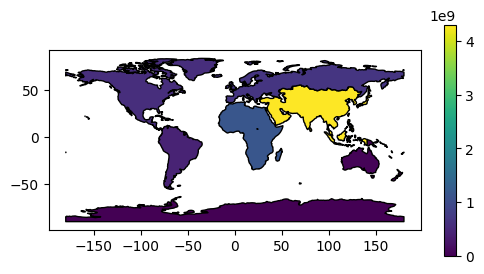

In [17]:
fig, ax = plt.subplots(figsize=(6,3))
world_agg2.plot(column='pop', edgecolor='black', legend=True, ax=ax)

In [18]:
world_agg3 = world.dissolve(
    by='continent', 
    aggfunc={
        'name_long': 'count',
        'pop': 'sum',
        'area_km2': 'sum'
    }).rename(columns={'name_long': 'n'}).reset_index()
world_agg3

,continent,geometry,n,pop,area_km2
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",51,1154946633.000,29946197.811
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",1,0.000,12335956.076
2,Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",47,4311408059.000,31252459.388
...,...,...,...,...,...
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",7,37757833.000,8504488.657
6,Seven seas (open ocean),"POLYGON ((68.935 -48.625, 68.8675 -48.83, 68.7...",1,0.000,11602.572
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",13,412060811.000,17762592.171


<Axes: >

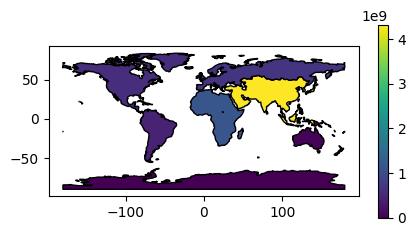

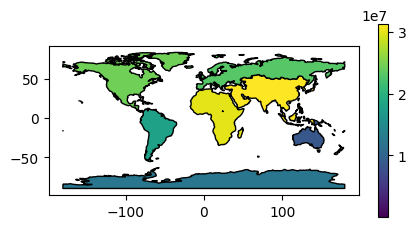

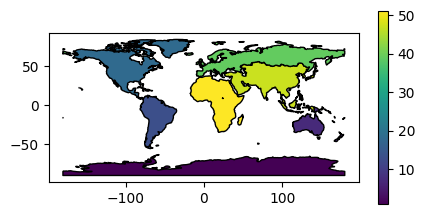

In [20]:
fig, ax = plt.subplots(figsize=(5,2.5))
world_agg3.plot(column='pop', edgecolor='black', legend=True, ax=ax)

fig, ax = plt.subplots(figsize=(5,2.5))
world_agg3.plot(column='area_km2', edgecolor='black', legend=True, ax=ax)

fig, ax = plt.subplots(figsize=(5,2.5))
world_agg3.plot(column='n', edgecolor='black', legend=True, ax=ax)


In [21]:
world_agg4 = world_agg3.drop(columns=['geometry'])
world_agg4['density'] = world_agg4['pop'] / world_agg4['area_km2']
world_agg4 = world_agg4.sort_values(by='n', ascending=False)
# world_agg4 = world_agg4.head(3)
world_agg4

,continent,n,pop,area_km2,density
0,Africa,51,1154946633.000,29946197.811,38.567
2,Asia,47,4311408059.000,31252459.388,137.954
3,Europe,39,669036256.000,23065218.786,29.006
...,...,...,...,...,...
5,Oceania,7,37757833.000,8504488.657,4.440
1,Antarctica,1,0.000,12335956.076,0.000
6,Seven seas (open ocean),1,0.000,11602.572,0.000


In [22]:
coffee_data = pd.read_csv('data/coffee_data.csv')
coffee_data

,name_long,coffee_production_2016,coffee_production_2017
0,Angola,NaN,NaN
1,Bolivia,3.000,4.000
2,Brazil,3277.000,2786.000
...,...,...,...
44,Zambia,3.000,NaN
45,Zimbabwe,1.000,1.000
46,Others,23.000,26.000


In [23]:
world_coffee = pd.merge(world, coffee_data, on='name_long', how='left')
world_coffee

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,coffee_production_2016,coffee_production_2017
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",NaN,NaN
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",81.000,66.000
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",NaN,NaN
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",NaN,NaN
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",NaN,NaN


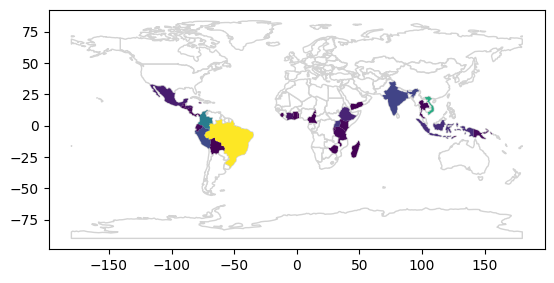

In [24]:
base = world_coffee.plot(color='white', edgecolor='lightgrey')
coffee_map = world_coffee.plot(ax=base, column='coffee_production_2017')

In [25]:
pd.merge(world, coffee_data, on='name_long', how='inner')

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,coffee_production_2016,coffee_production_2017
0,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",81.000,66.000
1,PG,Papua New Guinea,Oceania,Oceania,Melanesia,Sovereign country,464520.072,7755785.000,65.230,3709.082,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",114.000,74.000
2,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1819251.329,255131116.000,68.856,10003.089,"MULTIPOLYGON (((104.36999 -1.08484, 104.01079 ...",742.000,360.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,ET,Ethiopia,Africa,Africa,Eastern Africa,Sovereign country,1132393.167,97366774.000,64.535,1424.527,"MULTIPOLYGON (((47.78942 8.003, 46.94834 7.996...",215.000,283.000
43,UG,Uganda,Africa,Africa,Eastern Africa,Sovereign country,245768.479,38833338.000,59.224,1637.275,"MULTIPOLYGON (((33.90371 -0.95, 33.89357 0.109...",408.000,443.000
44,RW,Rwanda,Africa,Africa,Eastern Africa,Sovereign country,23365.411,11345357.000,66.188,1629.869,"MULTIPOLYGON (((30.4191 -1.13466, 29.82152 -1....",36.000,42.000


In [26]:
world2 = world.copy()
world2['pop_dens'] = world2['pop'] / world2['area_km2']
world2

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",45.921
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",56.001
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",175.049
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",18.452


In [27]:
world2['con_reg'] = world['continent'] + ':' + world2['region_un']
world2 = world2.drop(['continent', 'region_un'], axis=1)
world2

,iso_a2,name_long,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg
0,FJ,Fiji,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",45.921,Oceania:Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",56.001,Africa:Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa
...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222,Europe:Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",175.049,North America:Americas
176,SS,South Sudan,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",18.452,Africa:Africa


In [28]:
world2[['continent', 'region_un']] = world2['con_reg'].str.split(':', expand=True)
world2

,iso_a2,name_long,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg,continent,region_un
0,FJ,Fiji,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",45.921,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",56.001,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",175.049,North America:Americas,North America,Americas
176,SS,South Sudan,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",18.452,Africa:Africa,Africa,Africa


In [29]:
world2.rename(columns={'name_long': 'name'})

,iso_a2,name,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,pop_dens,con_reg,continent,region_un
0,FJ,Fiji,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",45.921,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",56.001,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",175.049,North America:Americas,North America,Americas
176,SS,South Sudan,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",18.452,Africa:Africa,Africa,Africa


In [30]:
new_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'geom', 'i', 'j', 'k', 'l']
world2.columns = new_names
world2

,a,b,c,d,e,f,g,h,geom,i,j,k,l
0,FJ,Fiji,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",45.921,Oceania:Oceania,Oceania,Oceania
1,TZ,Tanzania,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",56.001,Africa:Africa,Africa,Africa
2,EH,Western Sahara,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,Africa:Africa,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",162.222,Europe:Europe,Europe,Europe
175,TT,Trinidad and Tobago,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",175.049,North America:Americas,North America,Americas
176,SS,South Sudan,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",18.452,Africa:Africa,Africa,Africa


In [31]:
names = sorted(world2.columns, reverse=True)
world2 = world2[names]
world2

,l,k,j,i,h,geom,g,f,e,d,c,b,a
0,Oceania,Oceania,Oceania:Oceania,45.921,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16...",69.960,885806.000,19289.971,Sovereign country,Melanesia,Fiji,FJ
1,Africa,Africa,Africa:Africa,56.001,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02...",64.163,52234869.000,932745.792,Sovereign country,Eastern Africa,Tanzania,TZ
2,Africa,Africa,Africa:Africa,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27...",NaN,NaN,96270.601,Indeterminate,Northern Africa,Western Sahara,EH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Europe,Europe,Europe:Europe,162.222,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41...",71.098,1821800.000,11230.262,Sovereign country,Southern Europe,Kosovo,XK
175,Americas,North America,North America:Americas,175.049,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -...",70.426,1354493.000,7737.810,Sovereign country,Caribbean,Trinidad and Tobago,TT
176,Africa,Africa,Africa:Africa,18.452,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7...",55.817,11530971.000,624909.099,Sovereign country,Eastern Africa,South Sudan,SS


In [32]:
world2 = world2.drop('geom', axis=1)
world2 = pd.DataFrame(world2)
world2

,l,k,j,i,h,g,f,e,d,c,b,a
0,Oceania,Oceania,Oceania:Oceania,45.921,8222.254,69.960,885806.000,19289.971,Sovereign country,Melanesia,Fiji,FJ
1,Africa,Africa,Africa:Africa,56.001,2402.099,64.163,52234869.000,932745.792,Sovereign country,Eastern Africa,Tanzania,TZ
2,Africa,Africa,Africa:Africa,NaN,NaN,NaN,NaN,96270.601,Indeterminate,Northern Africa,Western Sahara,EH
...,...,...,...,...,...,...,...,...,...,...,...,...
174,Europe,Europe,Europe:Europe,162.222,8698.292,71.098,1821800.000,11230.262,Sovereign country,Southern Europe,Kosovo,XK
175,Americas,North America,North America:Americas,175.049,31181.821,70.426,1354493.000,7737.810,Sovereign country,Caribbean,Trinidad and Tobago,TT
176,Africa,Africa,Africa:Africa,18.452,1935.879,55.817,11530971.000,624909.099,Sovereign country,Eastern Africa,South Sudan,SS


## 2.3 Manipulating raster objects

In [33]:
elev = src_elev.read(1)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [34]:
elev3d = src_elev.read()
elev3d

array([[[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36]]], dtype=uint8)

In [35]:
elev3d.shape

(1, 6, 6)

(array([4., 3., 4., 3., 4., 3., 4., 3., 4., 4.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

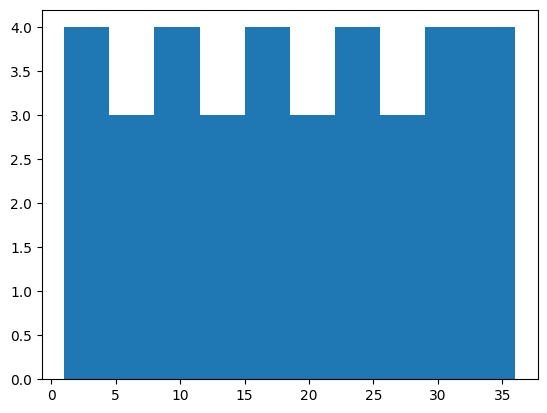

In [36]:
plt.hist(elev.flatten())

In [37]:
grain = src_grain.read(1)
grain

array([[1, 0, 1, 2, 2, 2],
       [0, 2, 0, 0, 2, 1],
       [0, 2, 2, 0, 0, 2],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1],
       [2, 1, 2, 2, 0, 2]], dtype=uint8)

In [38]:
freq = np.unique(grain, return_counts=True)
freq

(array([0, 1, 2], dtype=uint8), array([10, 13, 13]))

<BarContainer object of 3 artists>

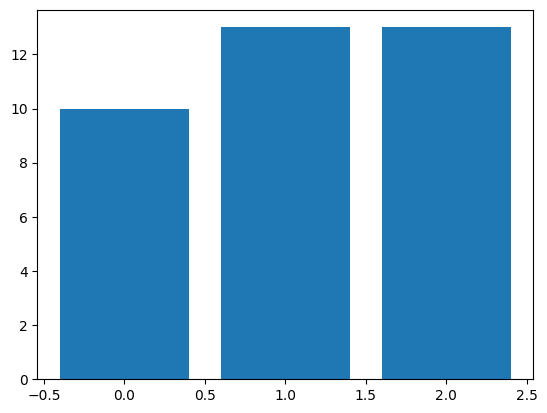

In [39]:
plt.bar(*freq)